# Notebook to make Fig. 4

In [0]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import pylab
import pandas as pd
import lal
from scipy.stats import gaussian_kde
import imageio
import importlib

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.lines import Line2D

import seaborn as sns
cp = sns.color_palette('colorblind')
cp2 = sns.color_palette('pastel')

from helper_functions import *

import sys
sys.path.append('../utils')
import reconstructwf as rwf

style.use('plotting.mplstyle')

### Load data

In [1]:
## TODO: finalize this with the real output dir
data_dir = '/Users/smiller/Documents/gw190521-timedomain-release/data_simonas_laptop/' 

angles_vs_time_dict =  np.load(data_dir+'angles_vs_time_dict.npy', allow_pickle=True).item()

In [2]:
# Reconstruction dict has the posterior values stored in it 
reconstruction_dict = np.load(data_dir+"waveform_reconstructions_L1.npy",allow_pickle=True).item()

In [5]:
angles_vs_time_dict['rd m10M'].keys()

dict_keys(['time_M', 'incl', 'theta_JL', 'phi_JL'])

### Make figure

Zoom in on a couple of times of interest ($t=-40M$ and $t=-10M$)

In [3]:
# Define some things for plotting
colors = ['blue', 'red']

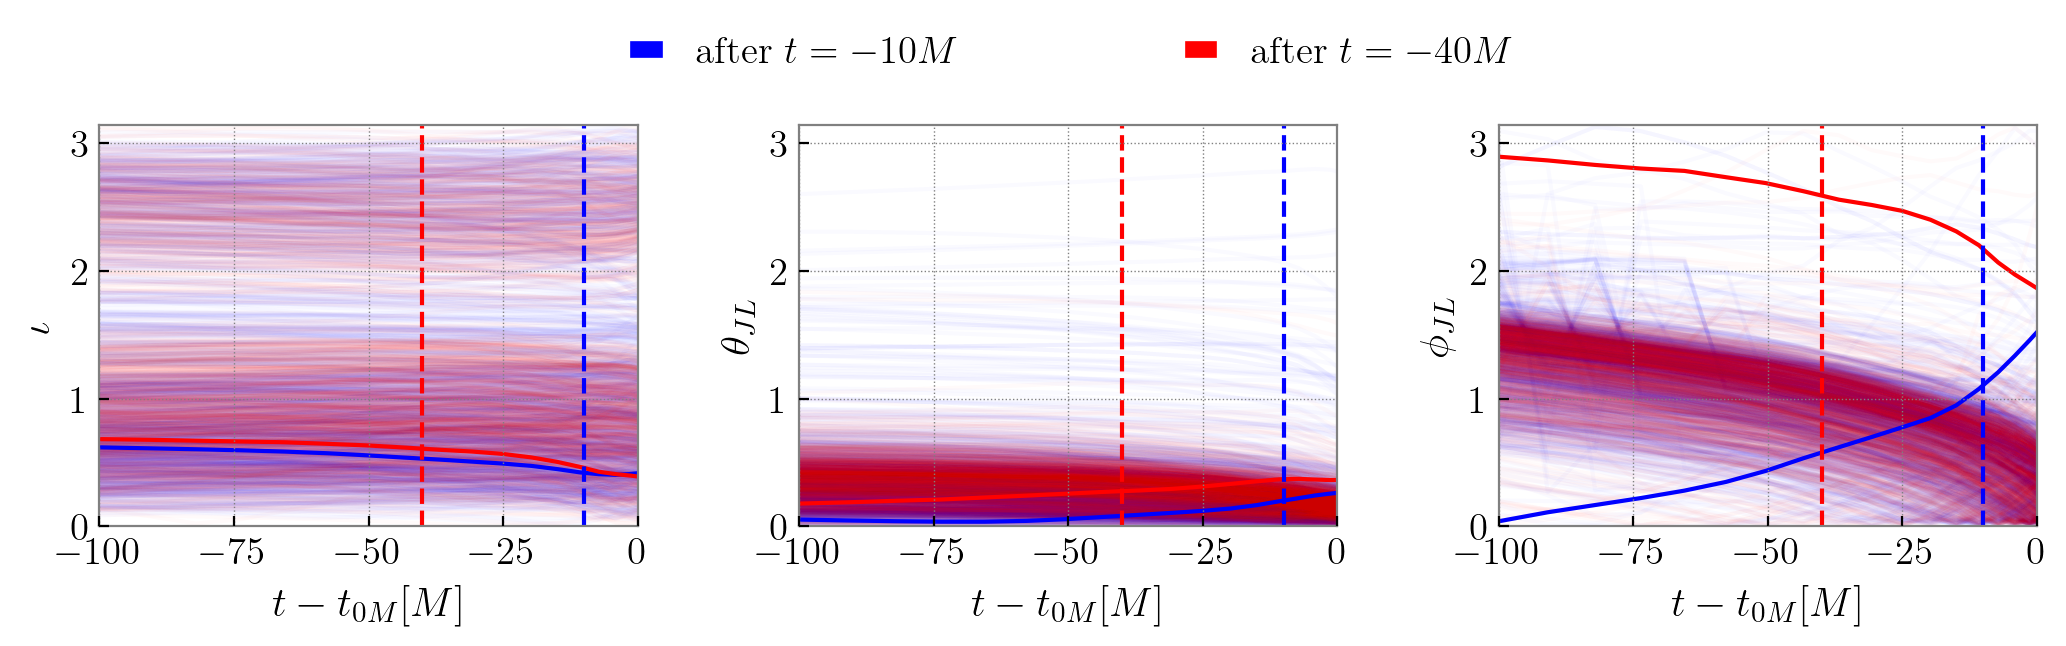

In [17]:
# Make figure
times_to_plot = ['m10M', 'm40M']
n_traces_to_plot = 500

fig, axes = plt.subplots(1, 3, figsize=(15/1.2, 25/8/1.2))

handles = []

for i,tc in enumerate(times_to_plot): 
    
    for j, angle in enumerate(['incl', 'theta_JL', 'phi_JL']): 
        
    
        # plot all traces
        angle_vs_time = np.asarray(angles_vs_time_dict[f'rd {tc}'][angle])
        time = np.asarray(angles_vs_time_dict[f'rd {tc}']['time_M'])
        axes[j].plot(time.T, angle_vs_time.T, color=colors[i], alpha=0.02, zorder=0)

        # plot maxP trace 
        imax = np.argmax(reconstruction_dict[f'rd {tc}']['params']['ln_posterior'])
        axes[j].plot(time[imax,:], angle_vs_time[imax,:], color=colors[i], alpha=1, zorder=1)

    lbl = tc.replace('m', '-') if tc[0]=='m' else tc
    handles.append(Line2D([], [], color=colors[i],label=f'after $t = {lbl}$'))

for ax in axes: 
    ax.axvline(-10, ls='--', color=colors[0])
    ax.axvline(-40, ls='--', color=colors[1])

    ax.set_xlim(-100, 0)
    ax.set_xlabel(r'$t-t_{0M} [M]$', fontsize=15)
    
    ax.set_ylim(0, np.pi)
    
axes[0].set_ylabel(r'$\iota$', fontsize=15)
axes[1].set_ylabel(r'$\theta_{JL}$', fontsize=15)
axes[2].set_ylabel(r'$\phi_{JL}$', fontsize=15)

# add legend
axes[1].legend(handles=handles, fontsize=14, bbox_to_anchor=(-0.35, 1.1, 1.7, .102), 
               loc='lower left', ncols=2, mode="expand", borderaxespad=0., frameon=False)

plt.subplots_adjust(wspace=0.3)

plt.savefig('figure_04.pdf', bbox_inches='tight')
plt.show()

Additional plots: 

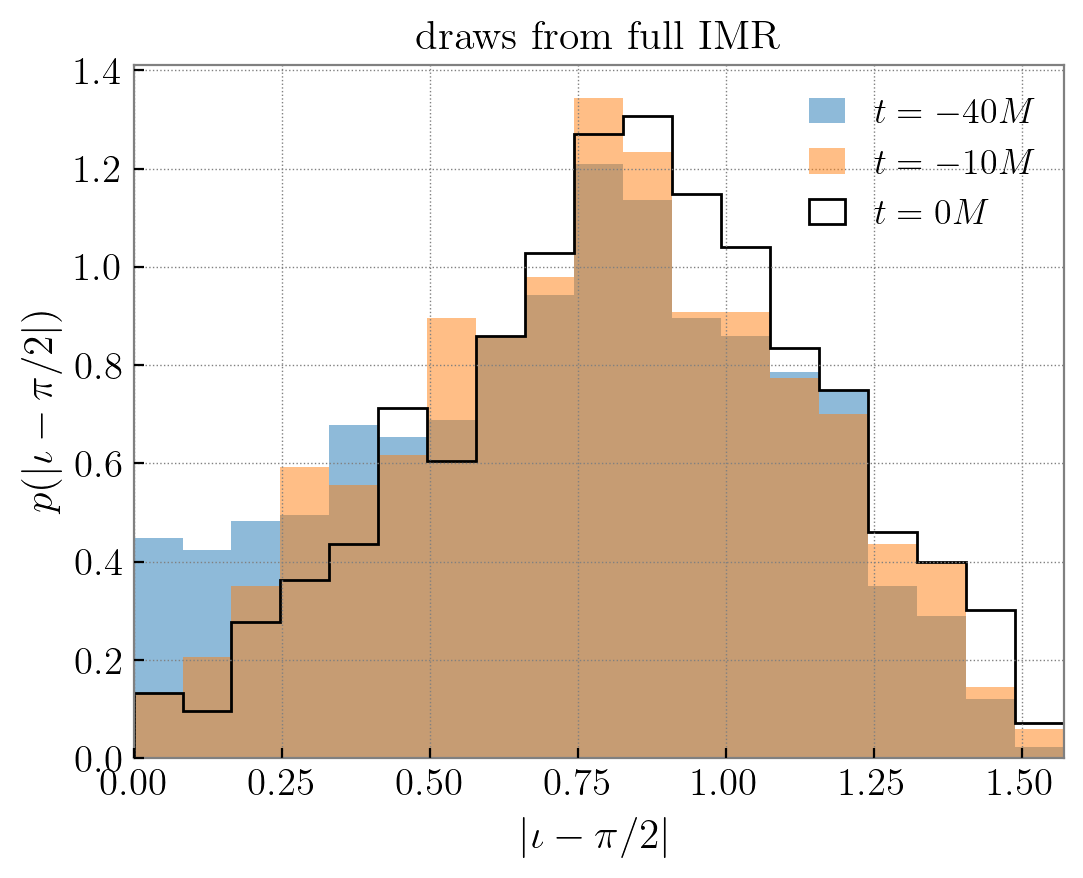

In [12]:
# iota at different times
iota_vs_time = np.asarray(angles_vs_time_dict['full']['incl'])
time = np.asarray(angles_vs_time_dict['full']['time_M'])

iota_m40_posterior = iota_vs_time[:,np.argmin(np.abs(time[0,:]+40))]
iota_m10_posterior = iota_vs_time[:,np.argmin(np.abs(time[0,:]+10))]
iota_0_posterior = iota_vs_time[:,np.argmin(np.abs(time[0,:]))]

iota_bins = np.linspace(0, np.pi/2, 20)
kws = dict(bins=iota_bins, density=True)

plt.figure()
plt.hist(np.abs(iota_m40_posterior-np.pi/2), **kws, alpha=0.5, label='$t=-40M$')
plt.hist(np.abs(iota_m10_posterior-np.pi/2), **kws, alpha=0.5, label='$t=-10M$')
plt.hist(np.abs(iota_0_posterior-np.pi/2), **kws, color='k',  histtype='step', label='$t=0M$')
plt.xlim(iota_bins[0], iota_bins[-1])
plt.legend(fontsize=13)
plt.xlabel(r'$|\iota - \pi/2|$', fontsize=15)
plt.ylabel(r'$p(|\iota - \pi/2|)$', fontsize=15)
plt.title('draws from full IMR', fontsize=15)
plt.show()